In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [220]:
data = pd.read_csv("tnk1.csv", sep = ";")
inx= np.where(data.iloc[0,:].notnull())[0]
Date = pd.to_datetime(data.iloc[1:,0])
data

,категория,авиабилеты,автосервис,аптеки,бары,"дом, ремонт",доставка еды,другое,ж/д билеты,зоомагазины,...,"обувь, одежда.2",отели.2,развлечения.2,супермаркеты.2,театры.2,топливо.2,транспорт.2,туры.2,фастфуд.2,фитнес.2
0,день,сумма трат,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,"0,010231","0,000343","0,003922","0,002554","0,005662","0,000109","0,051617","0,003117","0,000108",...,3572.0,7379.0,1566.0,535.0,2056.0,1072.0,321.0,9383.0,575.0,1750.0
2,2019-01-02,"0,012811","0,002439","0,008208","0,002381","0,026357","0,000151","0,094138","0,004136","0,000935",...,3433.0,8334.0,1547.0,605.0,2095.0,1132.0,337.0,8455.0,548.0,1813.0
3,2019-01-03,"0,013293","0,006182","0,008876","0,002737","0,033407","0,000177","0,114822","0,004039","0,001344",...,3508.0,7669.0,1629.0,587.0,2173.0,1133.0,302.0,9596.0,532.0,1931.0
4,2019-01-04,"0,014658","0,008501","0,009292","0,002677","0,036214","0,000181","0,119963","0,003979","0,001372",...,3507.0,6951.0,1659.0,598.0,2197.0,1143.0,288.0,10762.0,527.0,1899.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,2022-10-27,"0,014071","0,016562","0,011212","0,001037","0,033283","0,000365","0,128947","0,003577","0,001760",...,2789.0,4203.0,537.0,467.0,2927.0,1060.0,136.0,11275.0,374.0,2338.0
1397,2022-10-28,"0,013206","0,016844","0,011356","0,001957","0,034180","0,000537","0,135081","0,003165","0,001777",...,2835.0,4658.0,599.0,505.0,2776.0,1071.0,145.0,11099.0,436.0,2269.0
1398,2022-10-29,"0,008711","0,017328","0,010112","0,003045","0,041257","0,000520","0,118962","0,002689","0,001944",...,3209.0,4323.0,708.0,540.0,2576.0,1084.0,169.0,9705.0,553.0,2139.0
1399,2022-10-30,"0,008225","0,014515","0,009037","0,002262","0,036695","0,000424","0,107840","0,002704","0,001829",...,3289.0,4486.0,738.0,519.0,2702.0,1070.0,177.0,10010.0,545.0,2426.0


In [223]:
data_day_sum = data.iloc[1:, inx[1]:inx[2]].copy()
data_day_qv = data.iloc[1:, inx[2]:inx[3]].copy()
data_day_mean = data.iloc[1:,inx[3]:].copy()
data_day_mean.set_index(Date, inplace = True)
data_day_mean.index.rename("дата", inplace = True)
data_day_sum.set_index(Date, inplace = True)
data_day_sum.index.rename("дата", inplace = True)
data_day_qv.set_index(Date, inplace = True)
data_day_qv.index.rename("дата", inplace = True)
names = data_day_sum.columns.to_numpy()
dict1 = {a + ".2": a for a in names}
dict2 = {a + ".1": a for a in names}
data_day_mean.rename(columns = dict1, inplace = True)
data_day_qv.rename(columns = dict2, inplace = True)
data_day_sum = data_day_sum.applymap(lambda x: float(x.replace(",", ".")))
data_day_qv = data_day_qv.applymap(lambda x: float(x.replace(",", ".")))

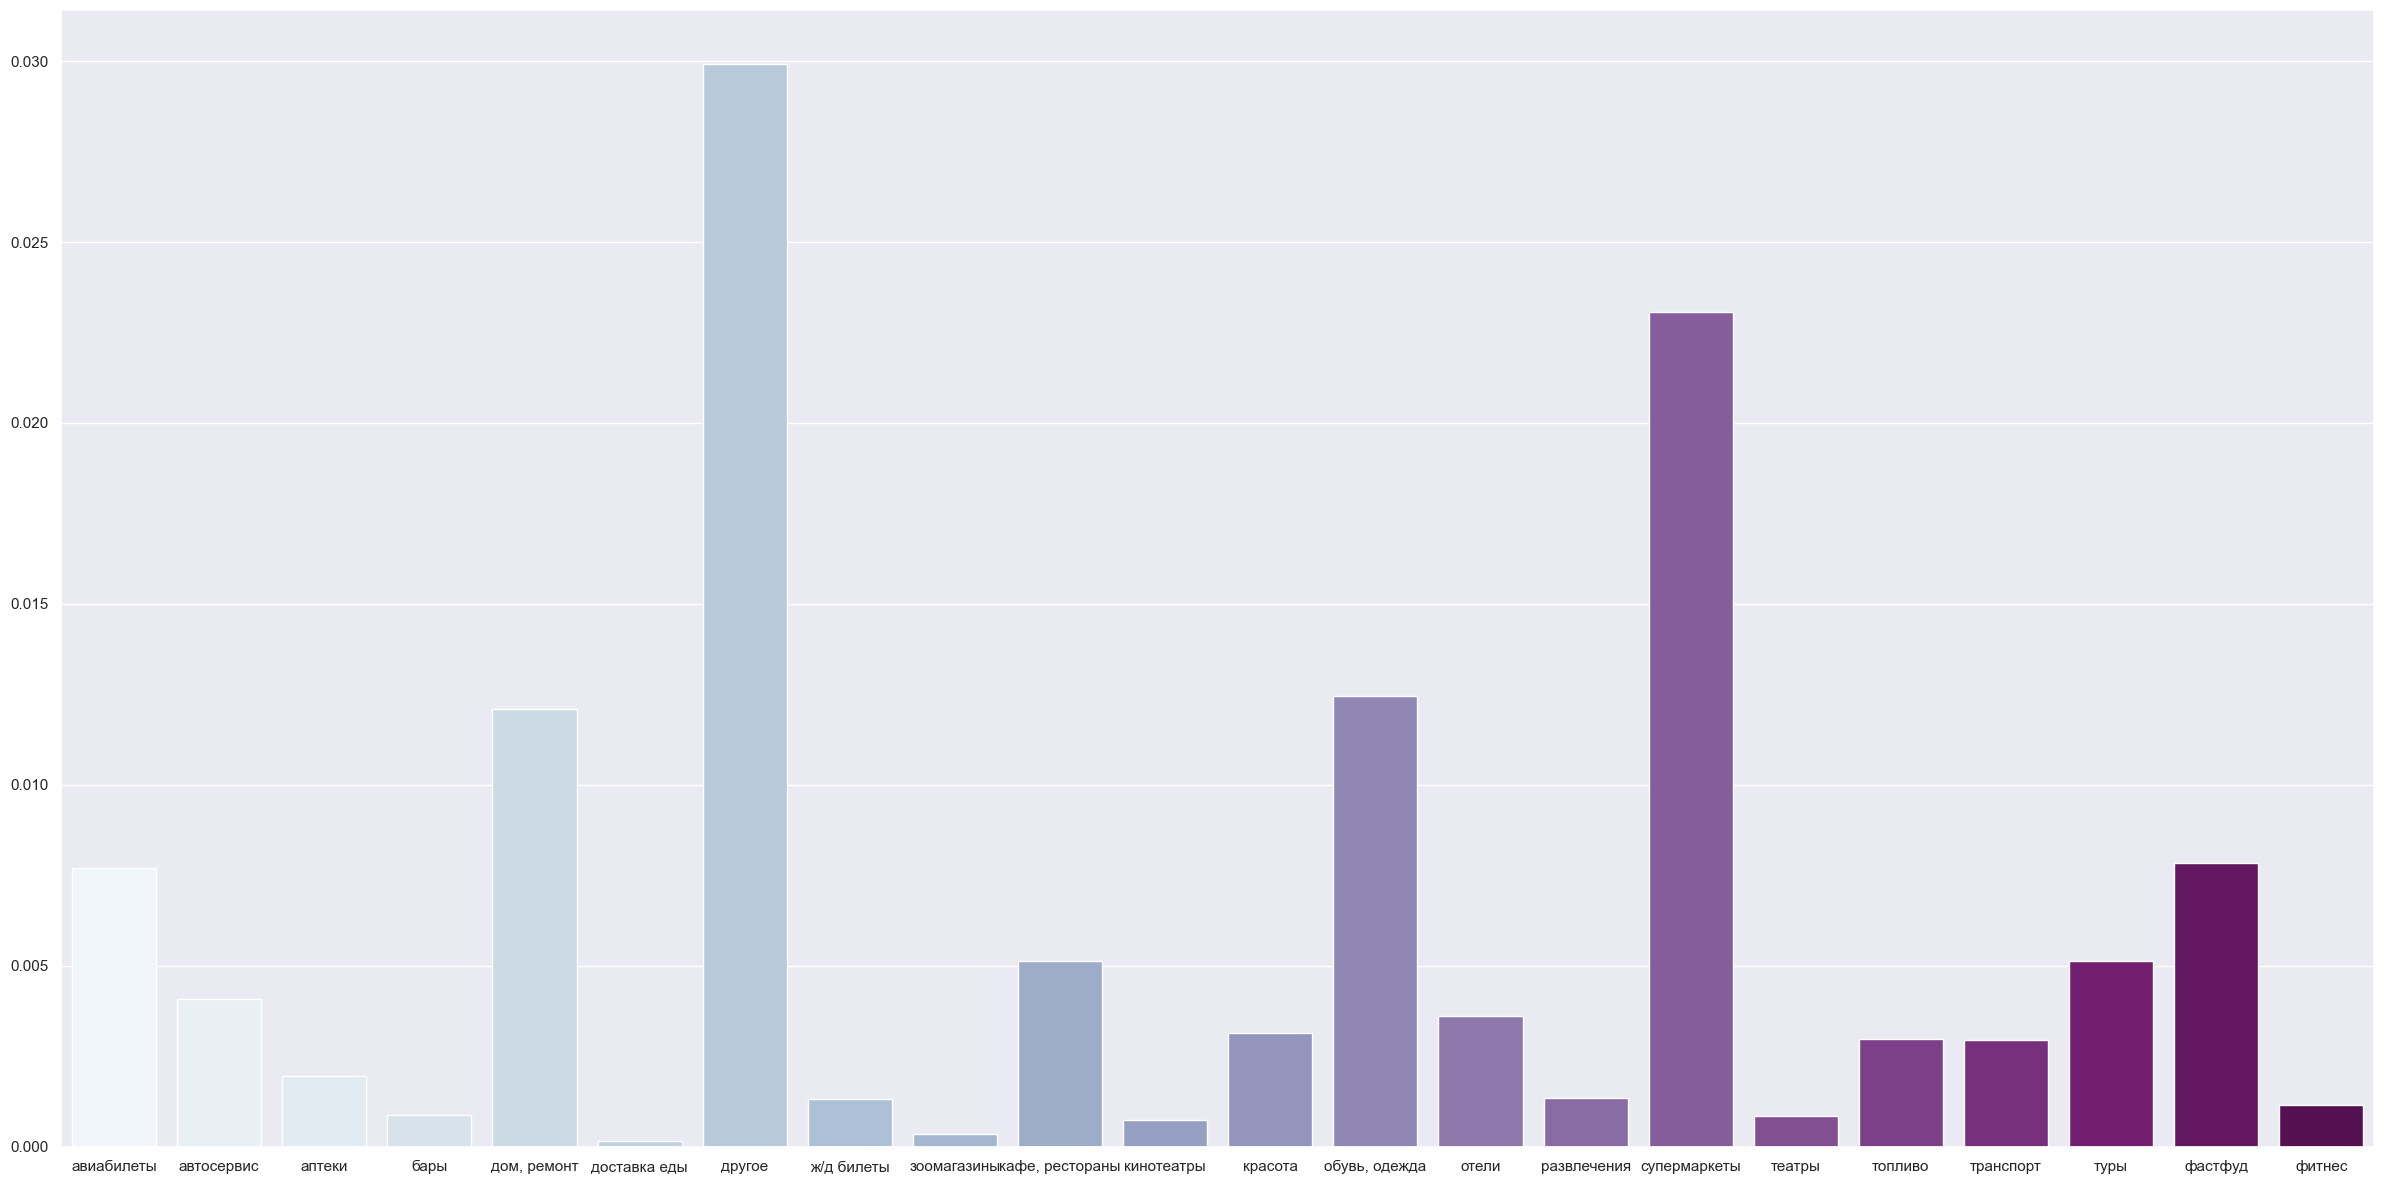

In [224]:
test = np.std(data_day_sum.to_numpy(), axis = 0)
fig = plt.figure(layout = "tight", figsize = (24,12))
ax = fig.add_subplot(111)
sns.barplot(x = data_day_sum.columns, y = test, ax = ax, palette = "BuPu")
pass

Из анализа графика очевидно, что наибольший разброс наблюдается в категории "другое"

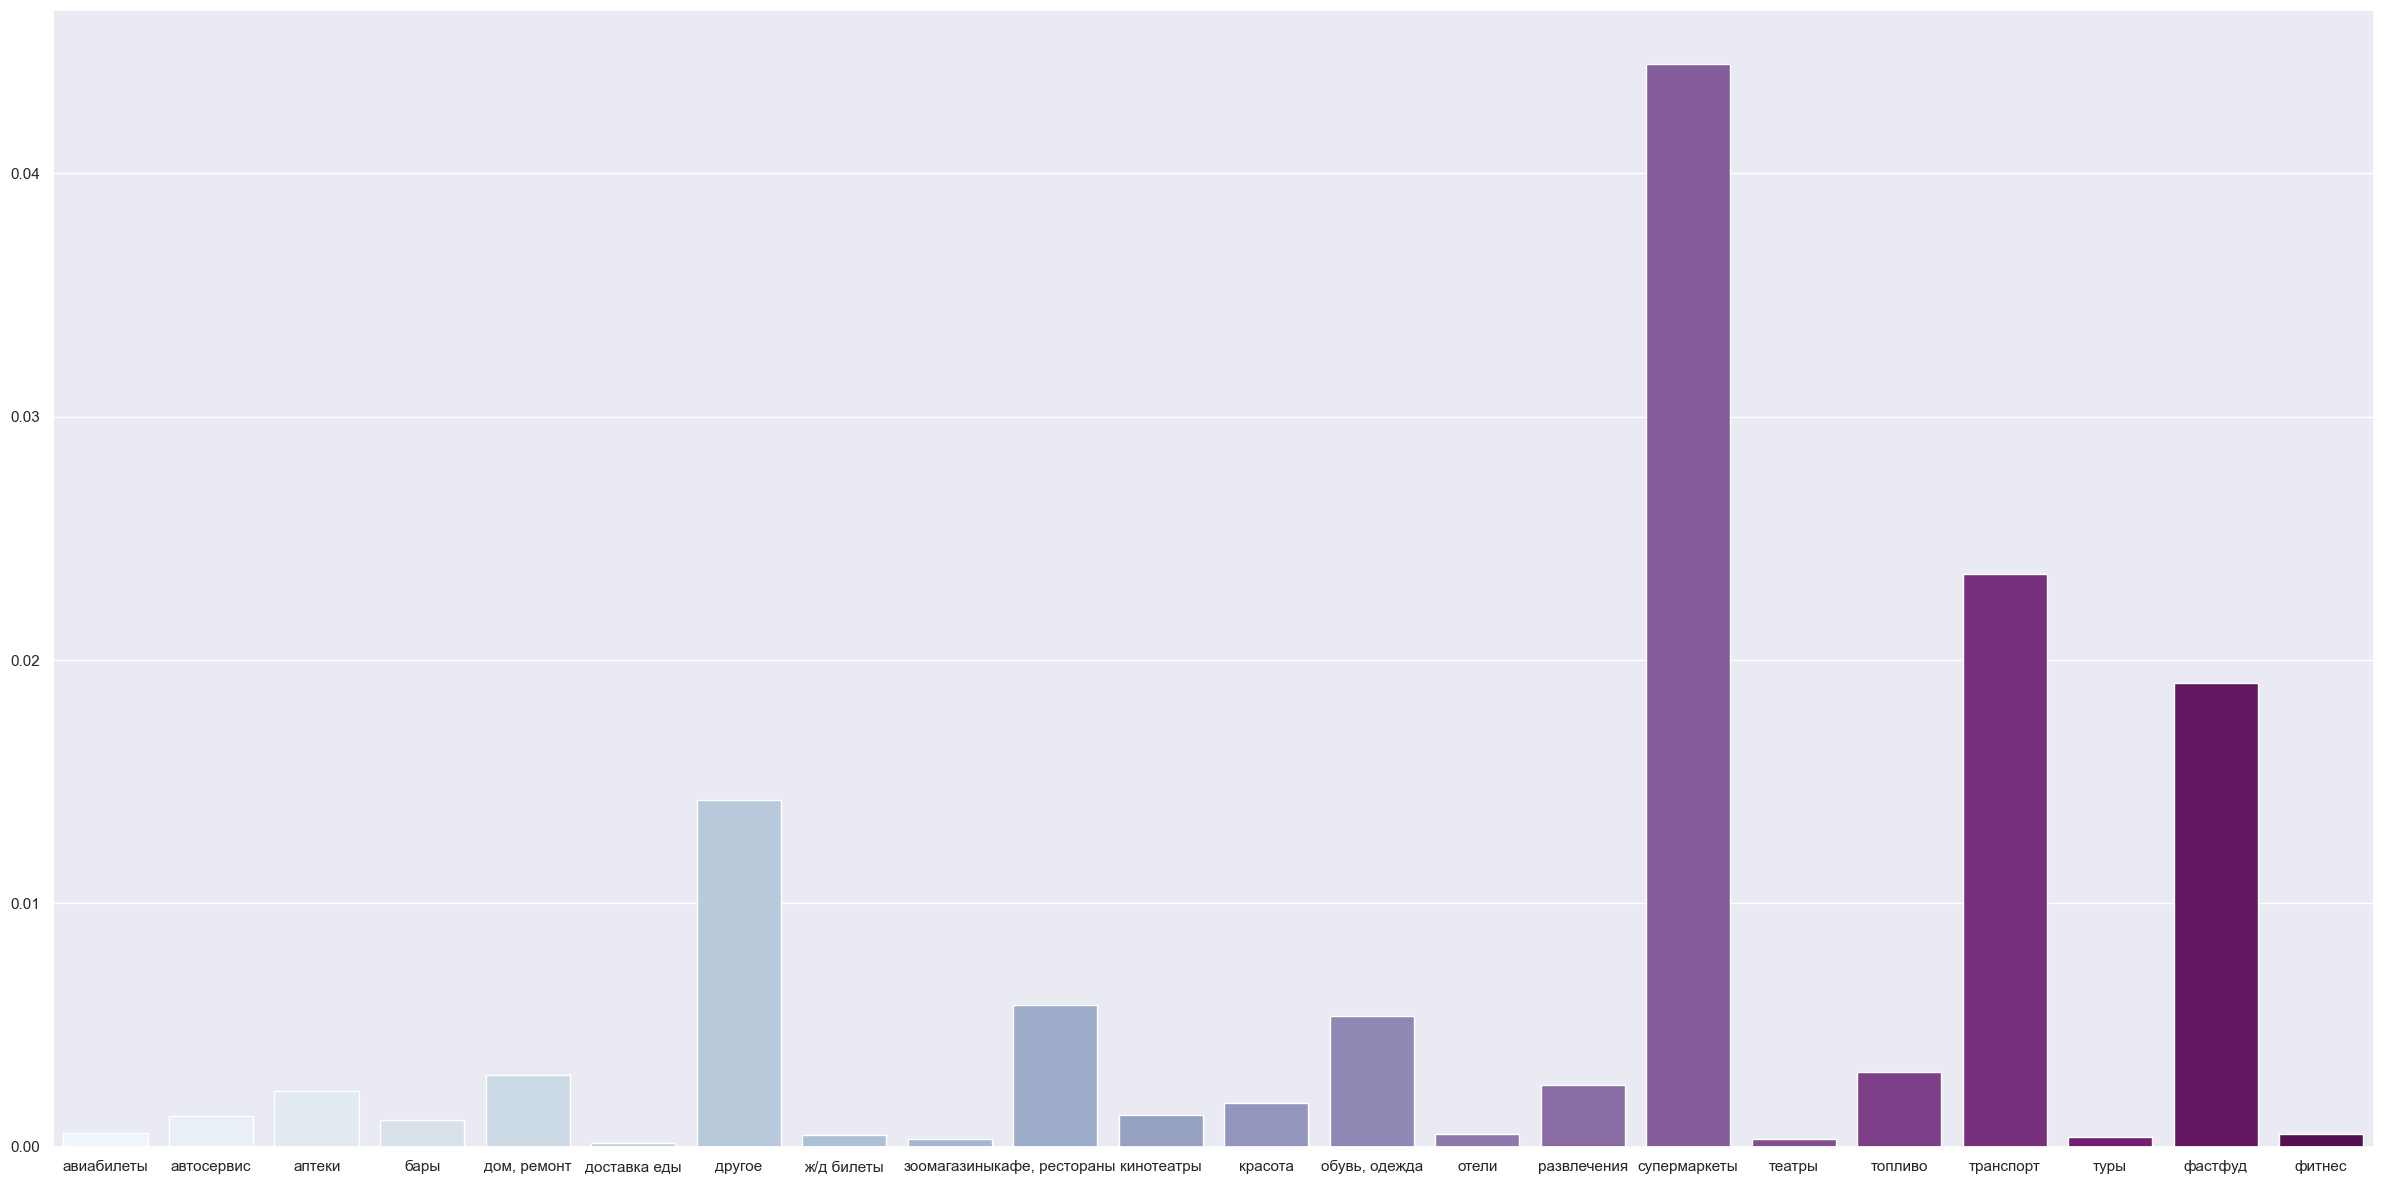

In [226]:
test = np.std(data_day_qv.to_numpy(), axis = 0)
fig = plt.figure(layout = "tight", figsize = (24,12))
ax = fig.add_subplot(111)
sns.barplot(x = data_day_qv.columns, y = test, ax = ax, palette = "BuPu")
pass

Из анализа графика очевидно, что наибольший разброс наблюдается в категории "супермаркеты"

In [241]:
data2 = pd.read_csv("tnk3.csv", sep = ";")
inx= np.where(data2.iloc[0,:].notnull())[0]
Date = pd.to_datetime(data2.iloc[1:,0])
data2.head()

,категория,авиабилеты,автосервис,аптеки,бары,"дом, ремонт",доставка еды,другое,ж/д билеты,зоомагазины,...,"обувь, одежда.2",отели.2,развлечения.2,супермаркеты.2,театры.2,топливо.2,транспорт.2,туры.2,фастфуд.2,фитнес.2
0,неделя,сумма трат,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-07,"0,0244327","0,0137357","0,0135920","0,0023660","0,0458398","0,0003116","0,1740180","0,0041131","0,0022385",...,3376.0,7982.0,1654.0,573.0,2875.0,1143.0,283.0,15551.0,415.0,2516.0
2,2019-01-14,"0,0312291","0,0151560","0,0141716","0,0021168","0,0447352","0,0003117","0,1868599","0,0044344","0,0022929",...,3225.0,7337.0,1776.0,555.0,3133.0,1150.0,259.0,18391.0,365.0,2566.0
3,2019-01-21,"0,0307135","0,0161400","0,0146586","0,0022196","0,0449453","0,0003331","0,1807256","0,0045839","0,0023382",...,3150.0,7147.0,1794.0,562.0,3169.0,1150.0,257.0,19890.0,366.0,2608.0
4,2019-01-28,"0,0363490","0,0151405","0,0151538","0,0023813","0,0449310","0,0003525","0,1824332","0,0048114","0,0024613",...,3267.0,7437.0,1870.0,555.0,3249.0,1138.0,257.0,20069.0,361.0,3012.0


In [242]:
data_week_sum = data2.iloc[1:, inx[1]:inx[2]].copy()
data_week_qv = data2.iloc[1:, inx[2]:inx[3]].copy()
data_week_mean = data2.iloc[1:,inx[3]:].copy()
data_week_mean.set_index(Date, inplace = True)
data_week_mean.index.rename("дата", inplace = True)
data_week_sum.set_index(Date, inplace = True)
data_week_sum.index.rename("дата", inplace = True)
data_week_qv.set_index(Date, inplace = True)
data_week_qv.index.rename("дата", inplace = True)
names = data_week_sum.columns.to_numpy()
dict1 = {a + ".2": a for a in names}
dict2 = {a + ".1": a for a in names}
data_week_mean.rename(columns = dict1, inplace = True)
data_week_qv.rename(columns = dict2, inplace = True)
data_week_sum = data_week_sum.applymap(lambda x: float(x.replace(",", ".")))
data_week_qv = data_week_qv.applymap(lambda x: float(x.replace(",", ".")))

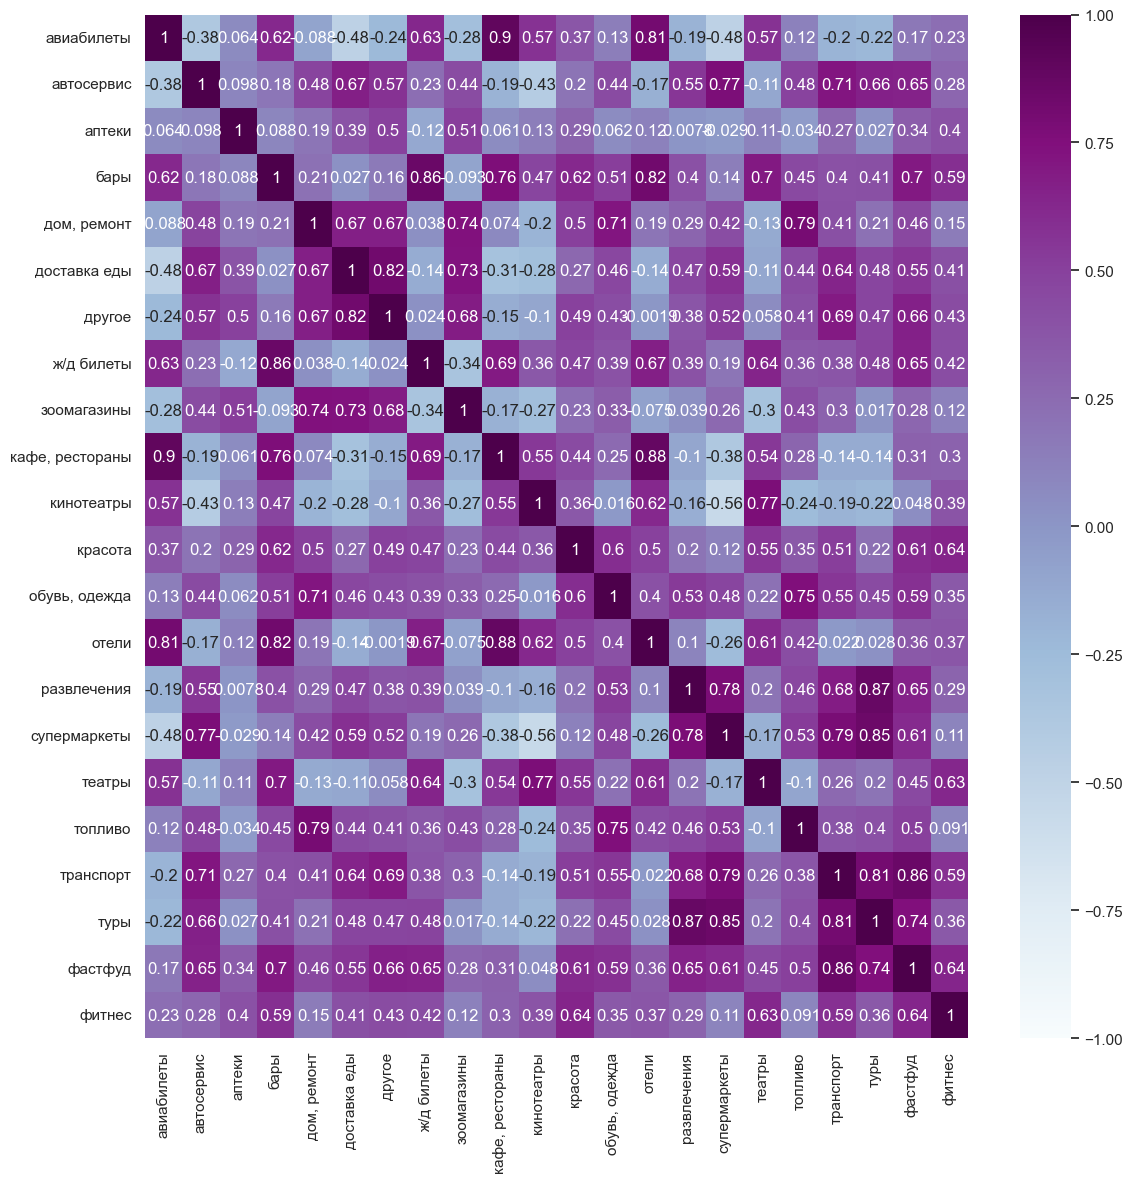

In [243]:
fig = plt.figure(layout = "tight", figsize = (12,12))
ax = fig.add_subplot(111)
sns.heatmap(data_week_qv.corr(), cmap = "BuPu", vmin = -1, vmax = 1, ax = ax, annot = True)
pass

Из карты видно:
Авиабилеты и кафе, рестораны сильно коррелируют друг с другом, это связано с тем, что, во-первых в аэропортах может быть дорогая еда, а во-вторых в путешествиях люди чаще питаются в ресторанах и кафе, пробуя местную кухню, чем готовят сами
Отели и каафе, рестораны сильно коррелируют друг с другом, причина этому описана выше
Развлечения и туры сильно коррелируют друг с другом, так как в путешествиях люди часто ходят на какие-либо экскурсии и пр.

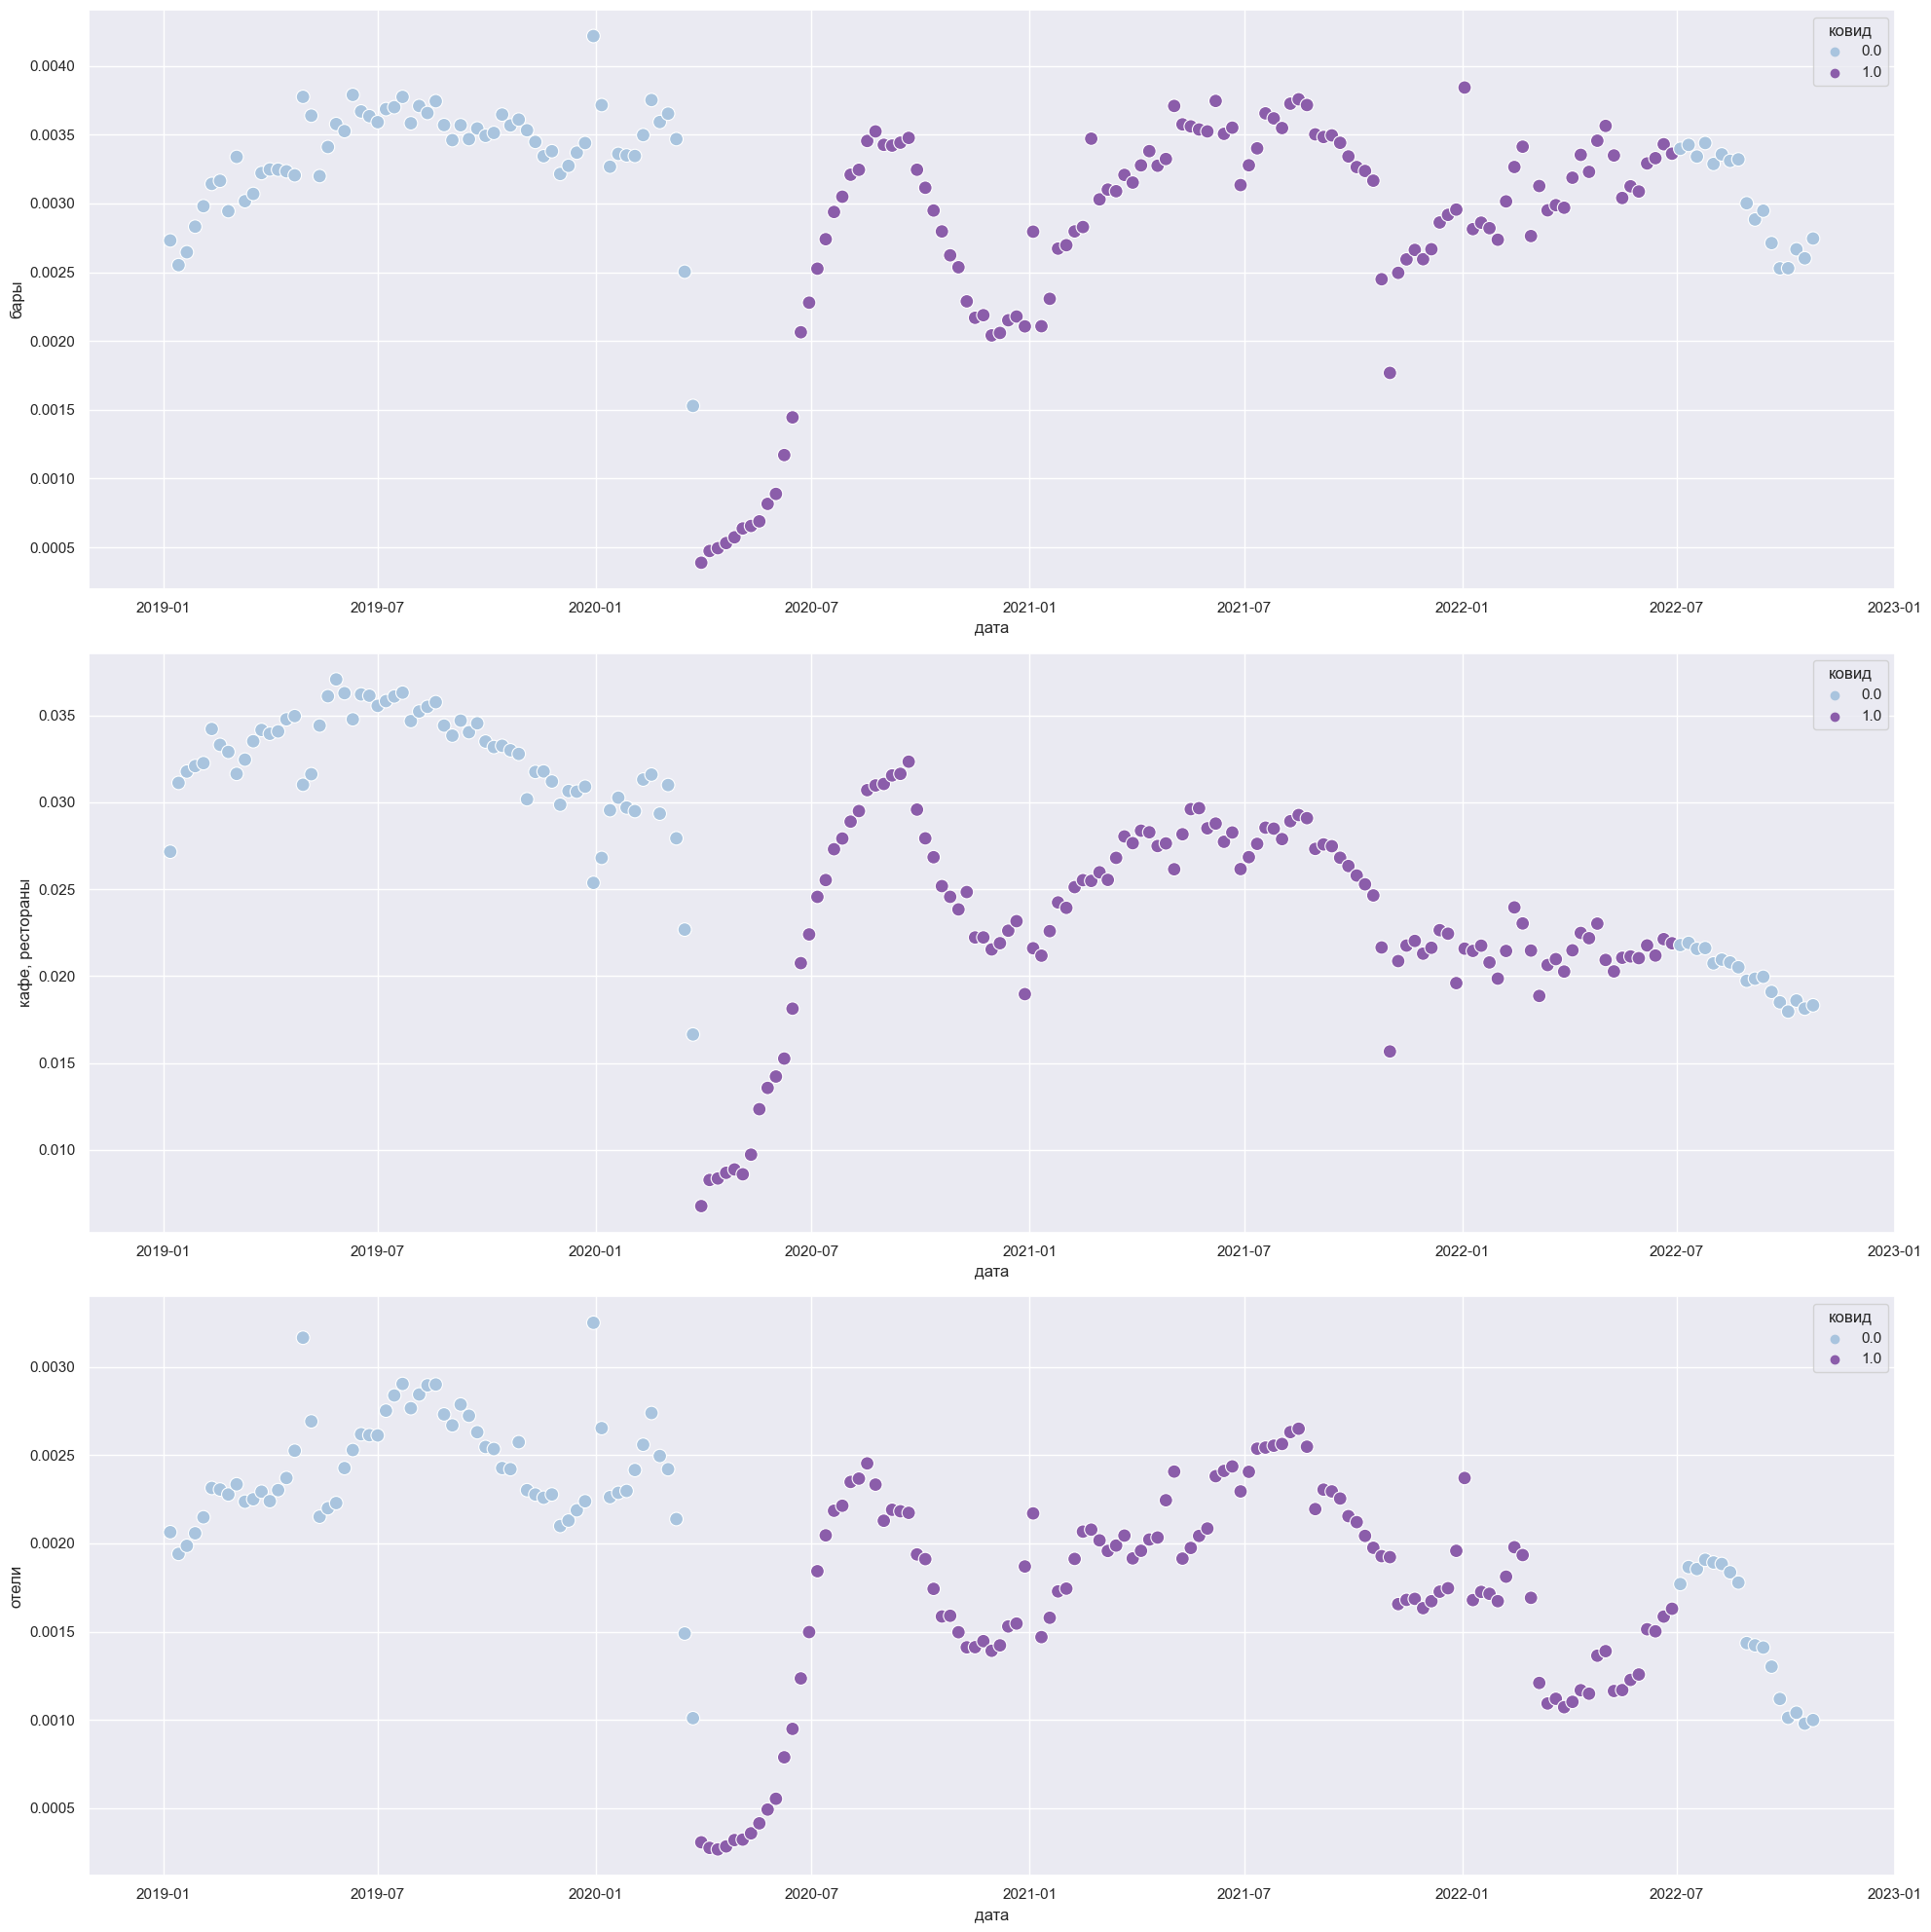

In [268]:
#date_range = pd.date_range (start = datetime.datetime(year = 2020, day = 7, month= 1) ,end = datetime.datetime(year=2022, day=24, month=10), freq = "W")
#infos = np.array([])
data_week_qv["ковид"] = np.zeros((199,1))
data_week_qv.loc[datetime.datetime(year = 2020, day = 28, month = 3) : datetime.datetime(year = 2022, day = 1, month = 7), "ковид"] = 1
fig = plt.figure(layout = "tight", figsize = (20,20))
ax_up = fig.add_subplot(311)
ax_mid = fig.add_subplot(312)
ax_down = fig.add_subplot(313)
sns.scatterplot(data = data_week_qv, x = data_week_qv.index, y = "бары", hue = "ковид", ax = ax_up, palette = "BuPu", s = 100)
sns.scatterplot(data = data_week_qv, x = data_week_qv.index, y = "кафе, рестораны", hue = "ковид", ax = ax_mid, palette = "BuPu", s = 100)
sns.scatterplot(data = data_week_qv, x = data_week_qv.index, y = "отели", hue = "ковид", ax = ax_down, palette = "BuPu", s = 100)
pass

In [285]:
data3 = pd.read_csv("tnk2.csv", sep = ";")
inx= np.where(data3.iloc[0,:].notnull())[0]
Date = pd.to_datetime(data3.iloc[1:,0])
data3.head()

,категория,авиабилеты,автосервис,аптеки,бары,"дом, ремонт",доставка еды,другое,ж/д билеты,зоомагазины,...,"обувь, одежда.2",отели.2,развлечения.2,супермаркеты.2,театры.2,топливо.2,транспорт.2,туры.2,фастфуд.2,фитнес.2
0,месяц,сумма трат,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,"0,031166","0,015136","0,015158","0,002646","0,048073","0,000336","0,190965","0,005052","0,002370",...,3310.0,7476.0,1741.0,561.0,2830.0,1144.0,270.0,16951.0,391.0,2606.0
2,2019-02-01,"0,033001","0,015833","0,015093","0,002579","0,045518","0,000389","0,186558","0,005070","0,002374",...,3208.0,7208.0,1811.0,558.0,3277.0,1130.0,259.0,18587.0,363.0,2526.0
3,2019-03-01,"0,040101","0,019520","0,015467","0,003002","0,052442","0,000409","0,214345","0,006375","0,002698",...,3311.0,7195.0,1817.0,558.0,3221.0,1122.0,254.0,18625.0,367.0,2572.0
4,2019-04-01,"0,038253","0,025833","0,015293","0,002706","0,052433","0,000374","0,201091","0,007942","0,002764",...,3104.0,7384.0,1749.0,511.0,3039.0,1115.0,247.0,19169.0,342.0,2447.0


In [286]:
data_m_sum = data3.iloc[1:, inx[1]:inx[2]].copy()
data_m_qv = data3.iloc[1:, inx[2]:inx[3]].copy()
data_m_mean = data3.iloc[1:,inx[3]:].copy()
data_m_mean.set_index(Date, inplace = True)
data_m_mean.index.rename("дата", inplace = True)
data_m_sum.set_index(Date, inplace = True)
data_m_sum.index.rename("дата", inplace = True)
data_m_qv.set_index(Date, inplace = True)
data_m_qv.index.rename("дата", inplace = True)
names = data_m_sum.columns.to_numpy()
dict1 = {a + ".2": a for a in names}
dict2 = {a + ".1": a for a in names}
data_m_mean.rename(columns = dict1, inplace = True)
data_m_qv.rename(columns = dict2, inplace = True)
data_m_sum = data_m_sum.applymap(lambda x: float(x.replace(",", ".")))
data_m_qv = data_m_qv.applymap(lambda x: float(x.replace(",", ".")))
data_m_mean["авиабилеты"] = data_m_mean["авиабилеты"].map(lambda x: float(x.replace(",", ".")))

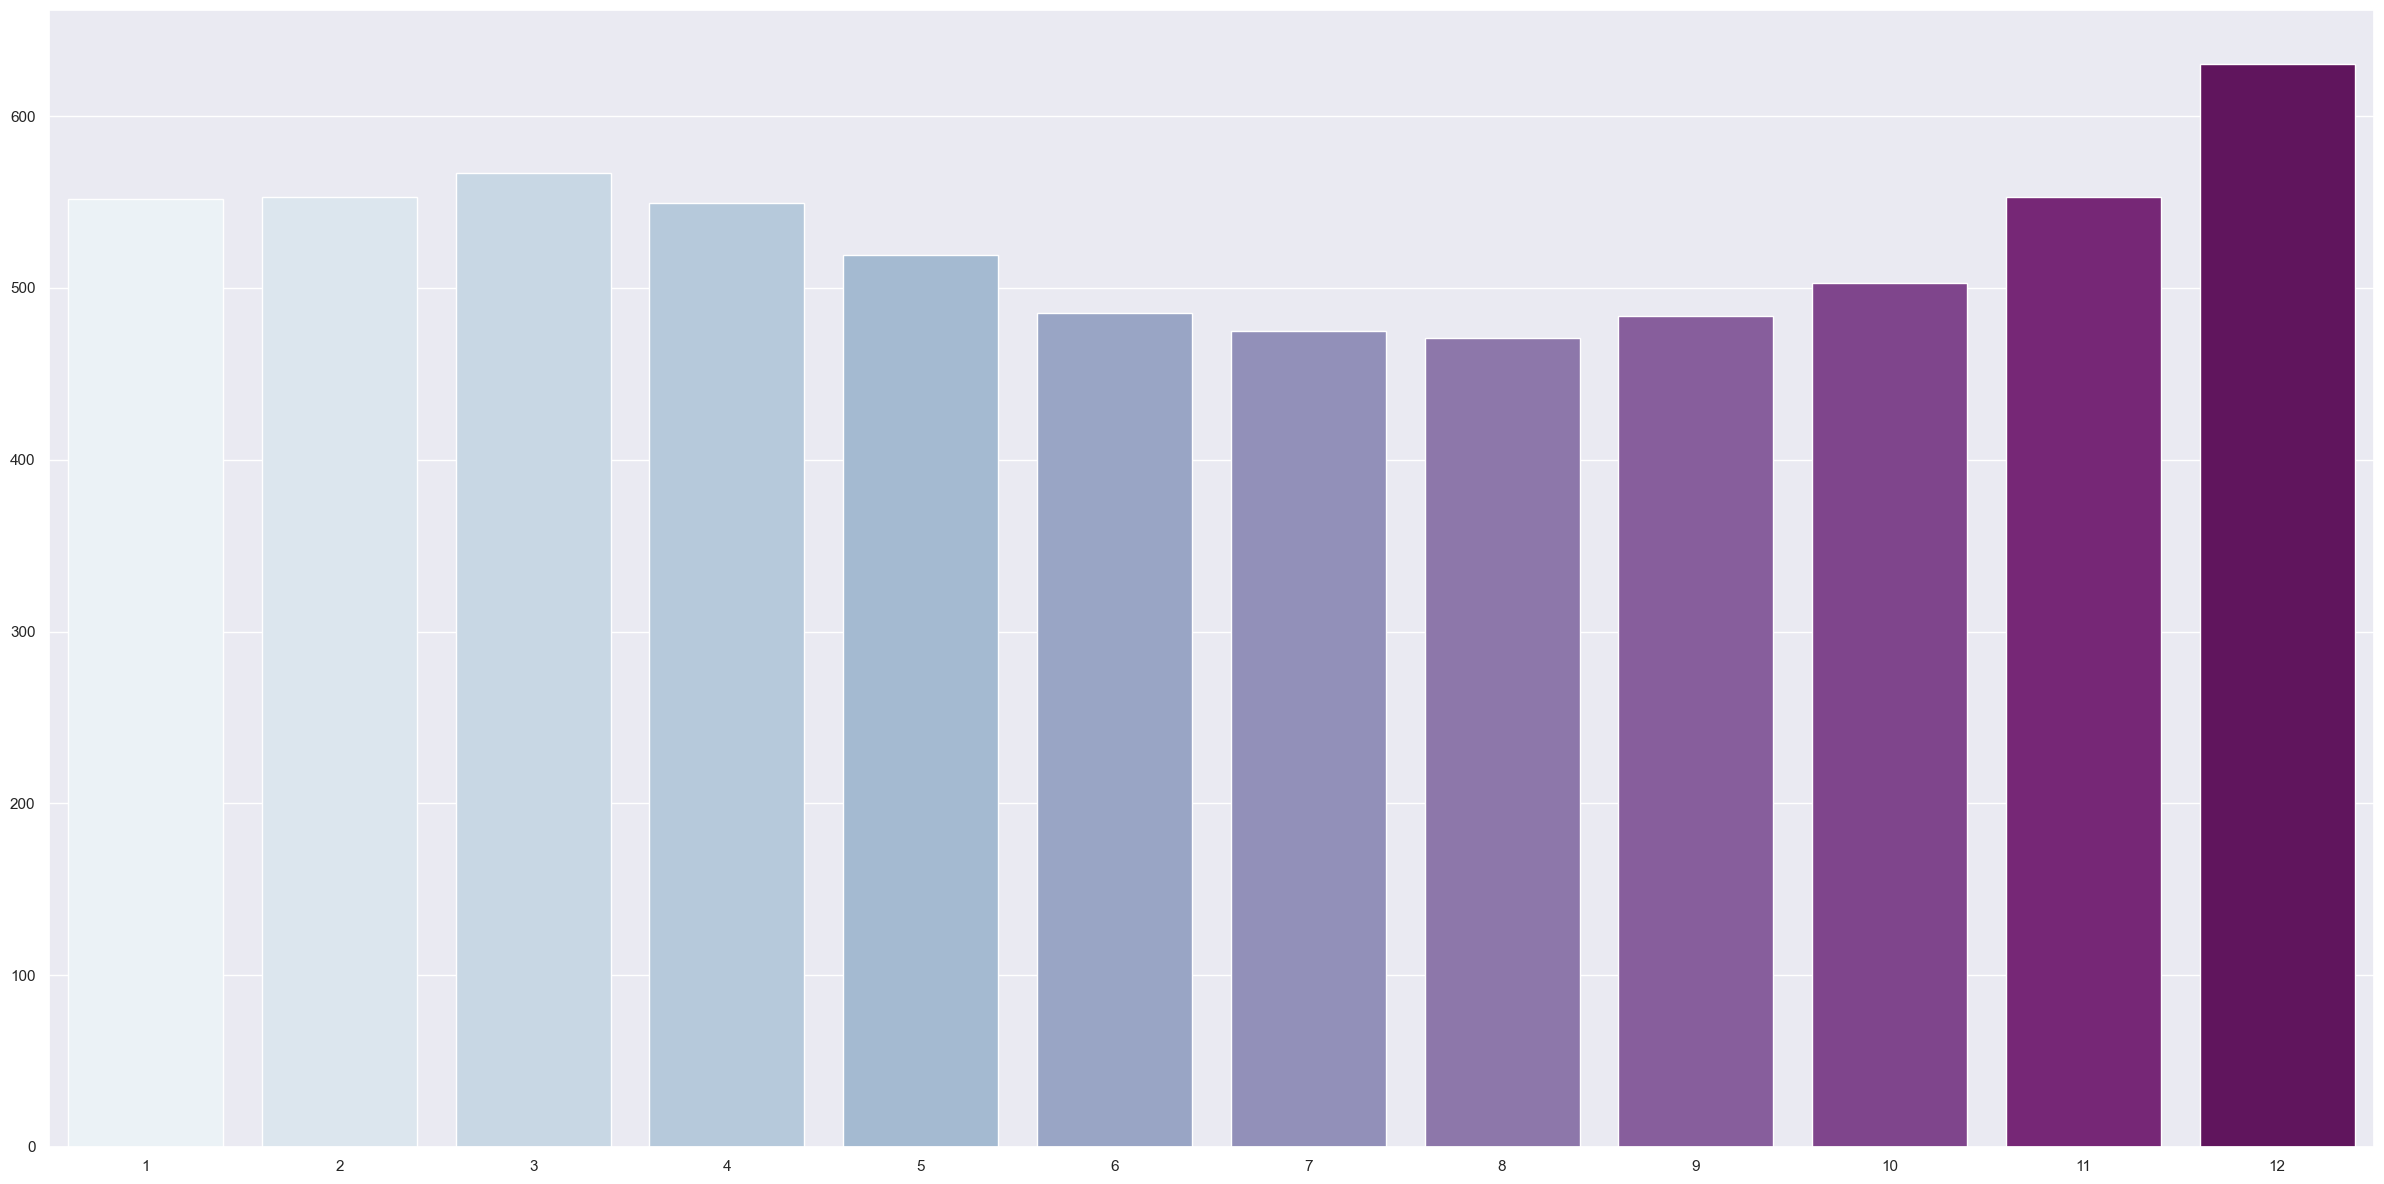

In [294]:
infos = np.array([])
for i in range(1, 13):
    infos = np.append(infos, data_m_mean.loc[(data_m_mean.index.month == i), "супермаркеты"].to_numpy().mean())
fig = plt.figure(layout = "tight", figsize = (24,12))
ax = fig.add_subplot(111)
sns.barplot(x = [i for i in range(1,13)], y = infos, ax = ax, palette = "BuPu")
pass

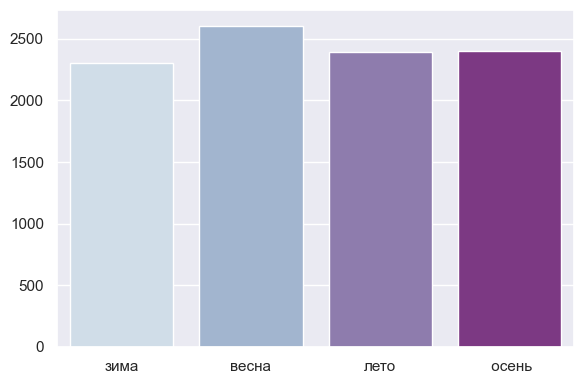

In [305]:
infos = np.array([0,0,0,0]).astype(float)
infos[0] = data_m_mean.loc[(data_m_sum.index.month == 1) | (data_m_sum.index.month == 2) | (data_m_sum.index.month == 12), "фитнес" ].to_numpy().mean()
infos[1] = data_m_mean.loc[(data_m_sum.index.month == 3) | (data_m_sum.index.month == 4) | (data_m_sum.index.month == 5), "фитнес" ].to_numpy().mean()
infos[2] = data_m_mean.loc[(data_m_sum.index.month == 6) | (data_m_sum.index.month == 7) | (data_m_sum.index.month == 8), "фитнес" ].to_numpy().mean()
infos[3] = data_m_mean.loc[(data_m_sum.index.month == 9) | (data_m_sum.index.month == 10) | (data_m_sum.index.month == 11), "фитнес" ].to_numpy().mean()
labels = ["зима", "весна", "лето", " осень"]
fig = plt.figure(layout = "tight", figsize = (6,4))
ax = fig.add_subplot(111)
sns.barplot(x = labels, y = infos, ax = ax, palette = "BuPu")
pass

Гипотеза 1: Летом "курортный сезон", следовательно стоимость туров должна увеличиваться

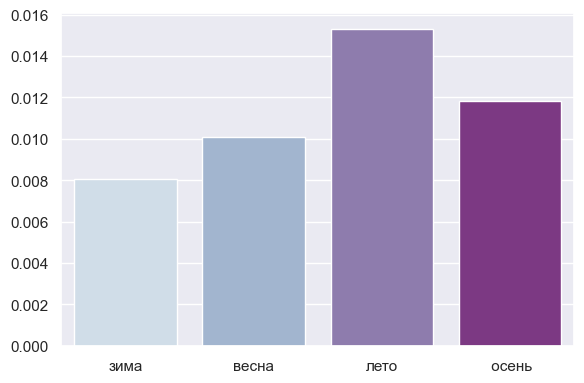

In [310]:
infos = np.array([0,0,0,0]).astype(float)
infos[0] = data_m_sum.loc[(data_m_sum.index.month == 1) | (data_m_sum.index.month == 2) | (data_m_sum.index.month == 12), "туры" ].to_numpy().mean()
infos[1] = data_m_sum.loc[(data_m_sum.index.month == 3) | (data_m_sum.index.month == 4) | (data_m_sum.index.month == 5), "туры" ].to_numpy().mean()
infos[2] = data_m_sum.loc[(data_m_sum.index.month == 6) | (data_m_sum.index.month == 7) | (data_m_sum.index.month == 8), "туры" ].to_numpy().mean()
infos[3] = data_m_sum.loc[(data_m_sum.index.month == 9) | (data_m_sum.index.month == 10) | (data_m_sum.index.month == 11), "туры" ].to_numpy().mean()
fig = plt.figure(layout = "tight", figsize = (6,4))
ax = fig.add_subplot(111)
sns.barplot(x = labels, y = infos, ax = ax, palette = "BuPu")
pass

Вывод 1: Гипотеза поттвердилась, летом стоимость туров действительно значительно больше, чем в другие месяца

Гипотеза 2: Перед началом зимы траты на одежду выше, так как надо купить теплые вещи

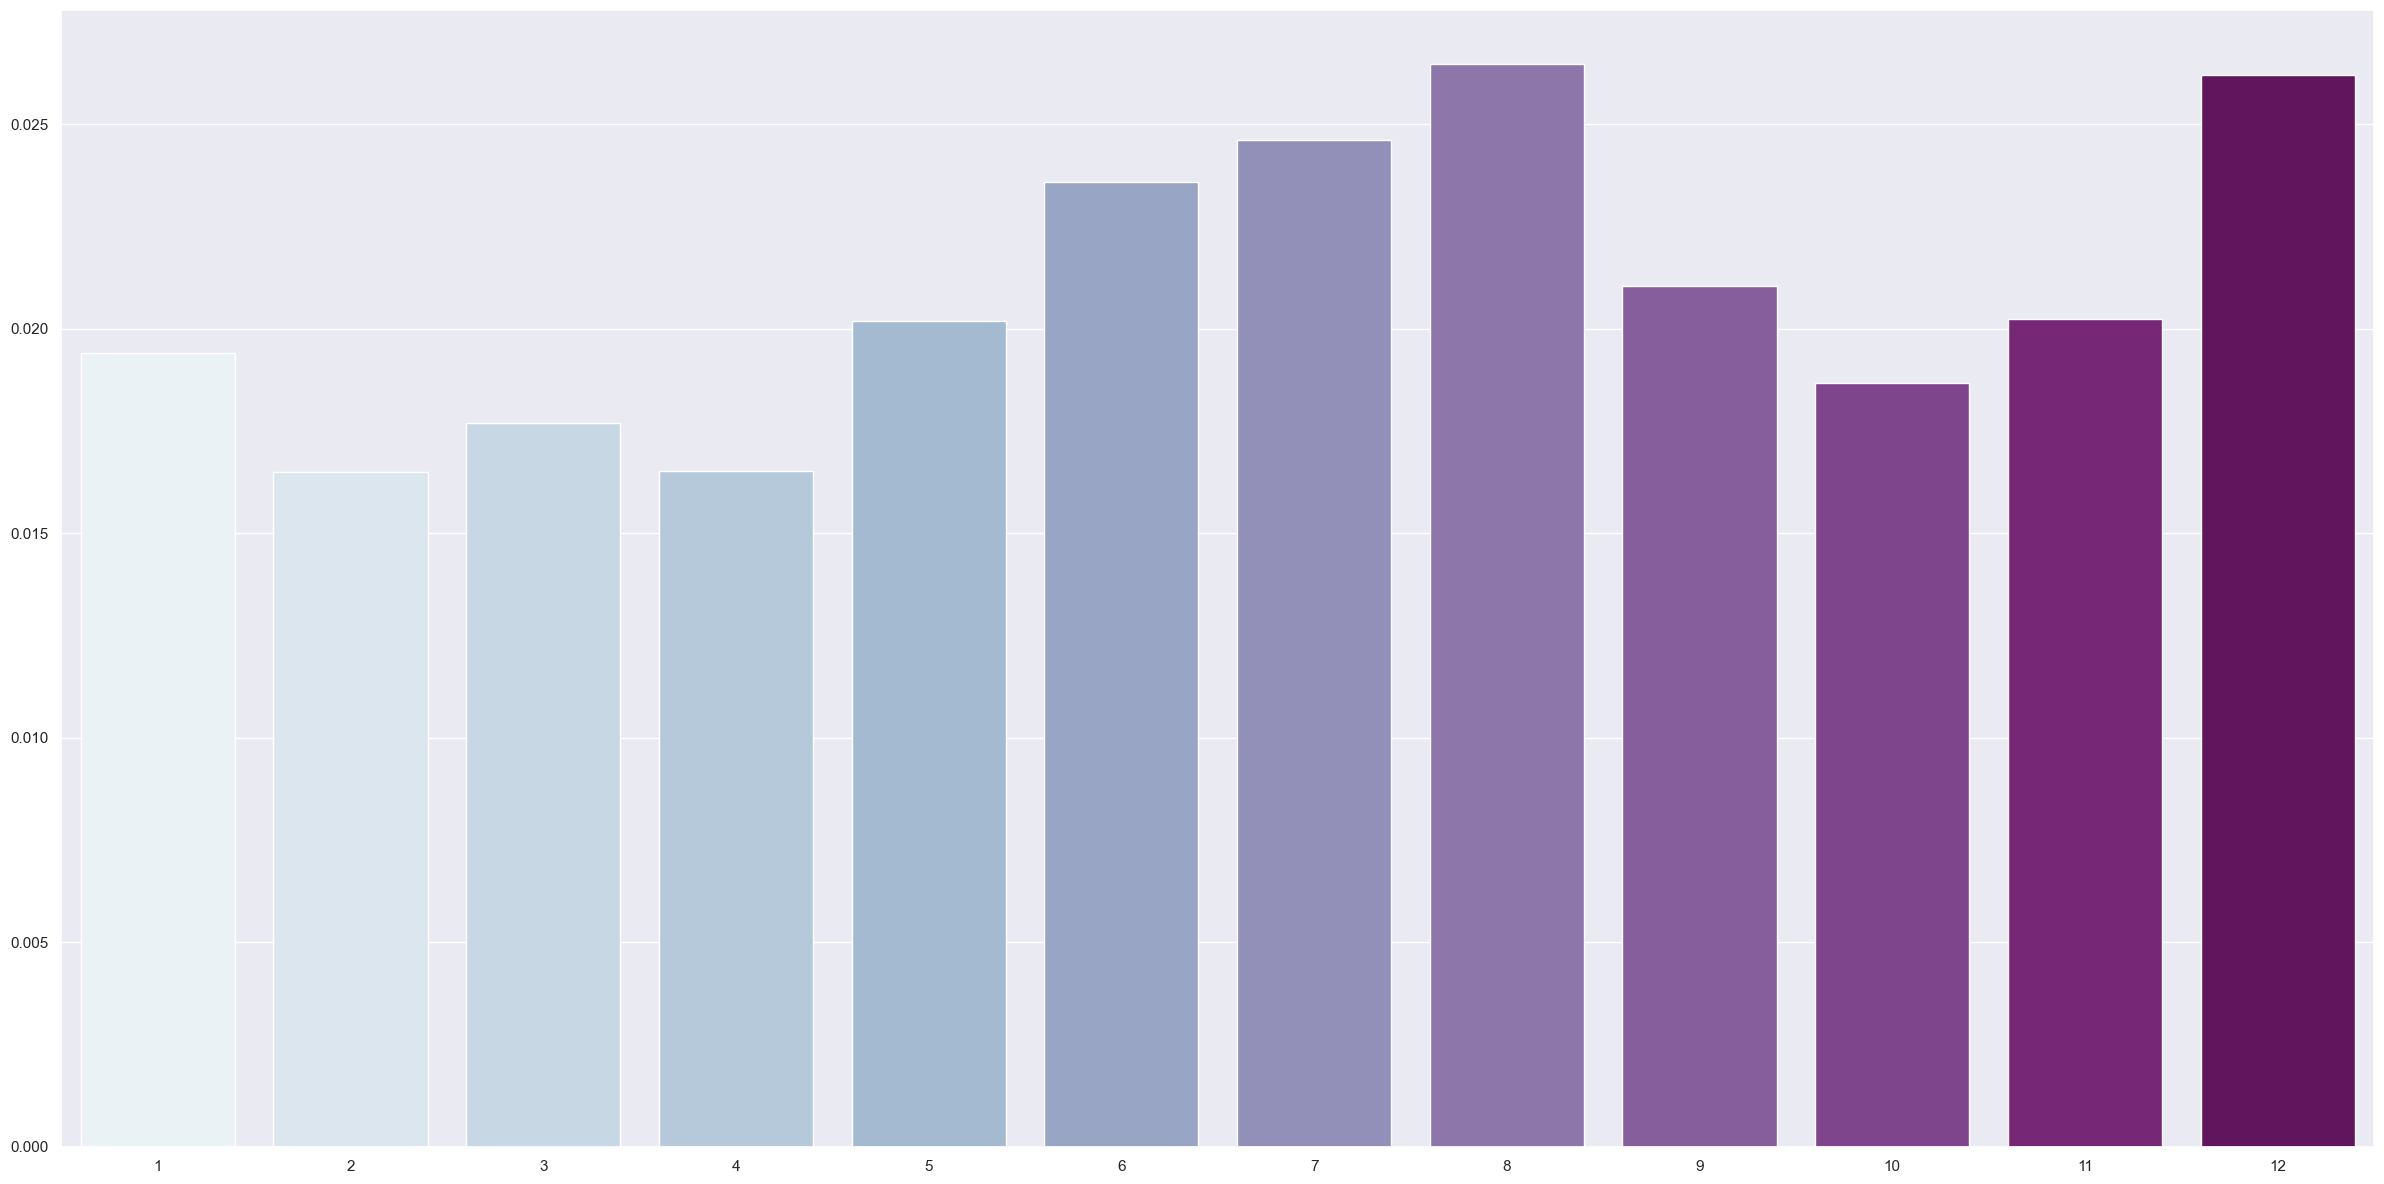

In [314]:
infos = np.array([])
for i in range(1, 13):
    infos = np.append(infos, data_m_qv.loc[(data_m_mean.index.month == i), "обувь, одежда"].to_numpy().mean())
fig = plt.figure(layout = "tight", figsize = (24,12))
ax = fig.add_subplot(111)
sns.barplot(x = [i for i in range(1,13)], y = infos, ax = ax, palette = "BuPu")
pass

Вывод 2: Подобная тенденция начинается уже в начале осени

Гипотеза 3: С началом ковида возросла популярность доставки еды

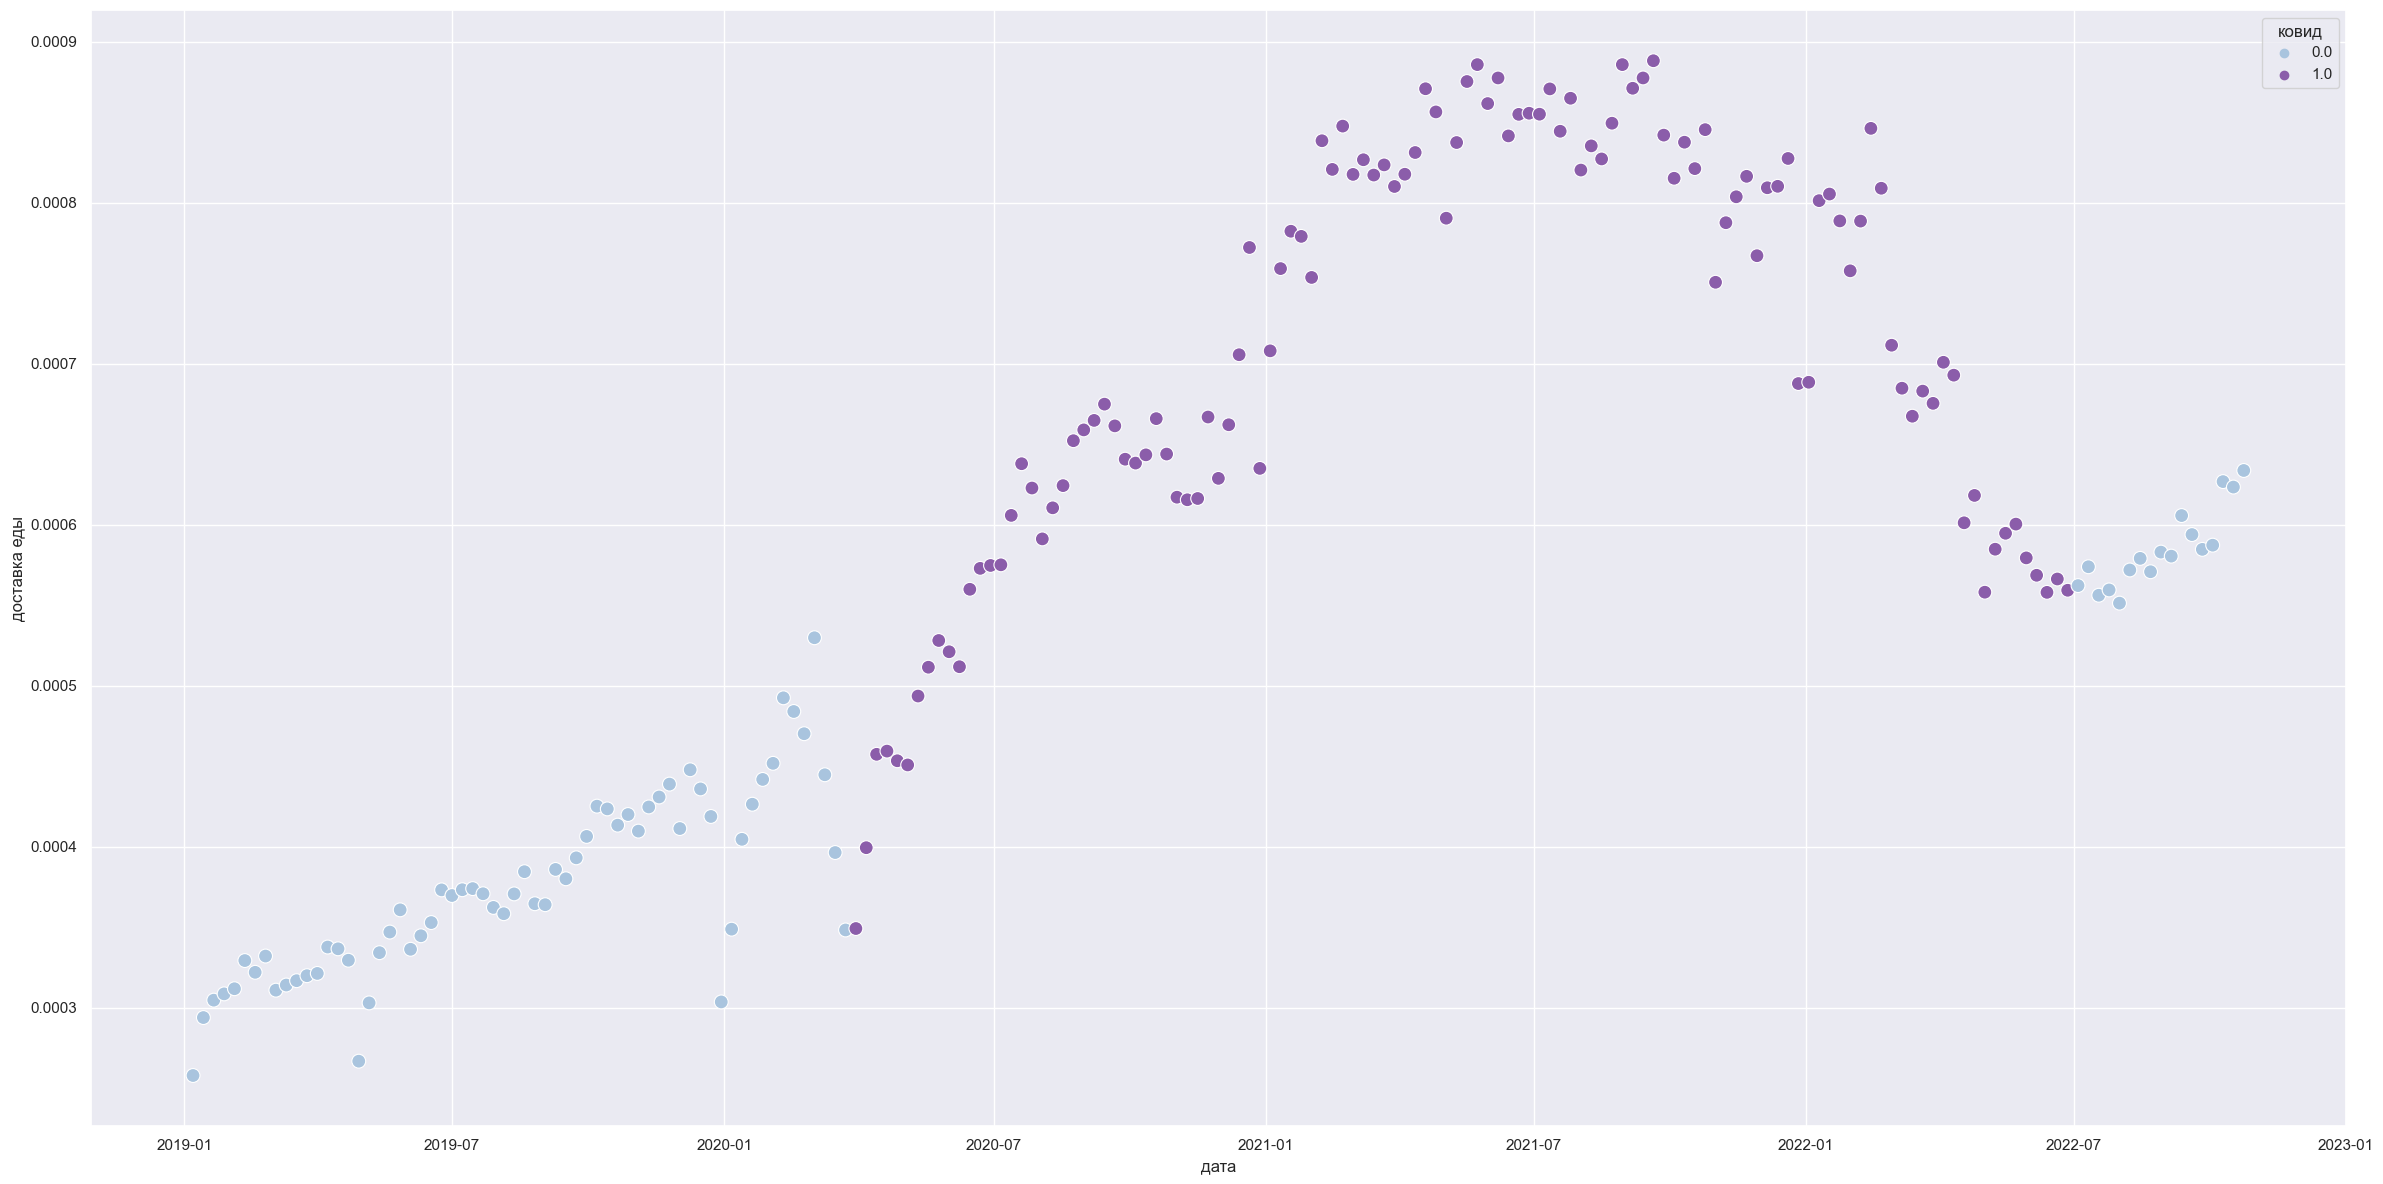

In [320]:
data_week_qv["ковид"] = np.zeros((199,1))
data_week_qv.loc[datetime.datetime(year = 2020, day = 28, month = 3) : datetime.datetime(year = 2022, day = 1, month = 7), "ковид"] = 1
fig = plt.figure(layout = "tight", figsize = (24,12))
ax = fig.add_subplot(111)
sns.scatterplot(data = data_week_qv, x = data_week_qv.index, y = "доставка еды", hue = "ковид", ax = ax, palette = "BuPu", s = 100)
pass

Вывод 3: Гипотеза вполне подтвердилась

Гипотеза 4: топливо дорожает со временем

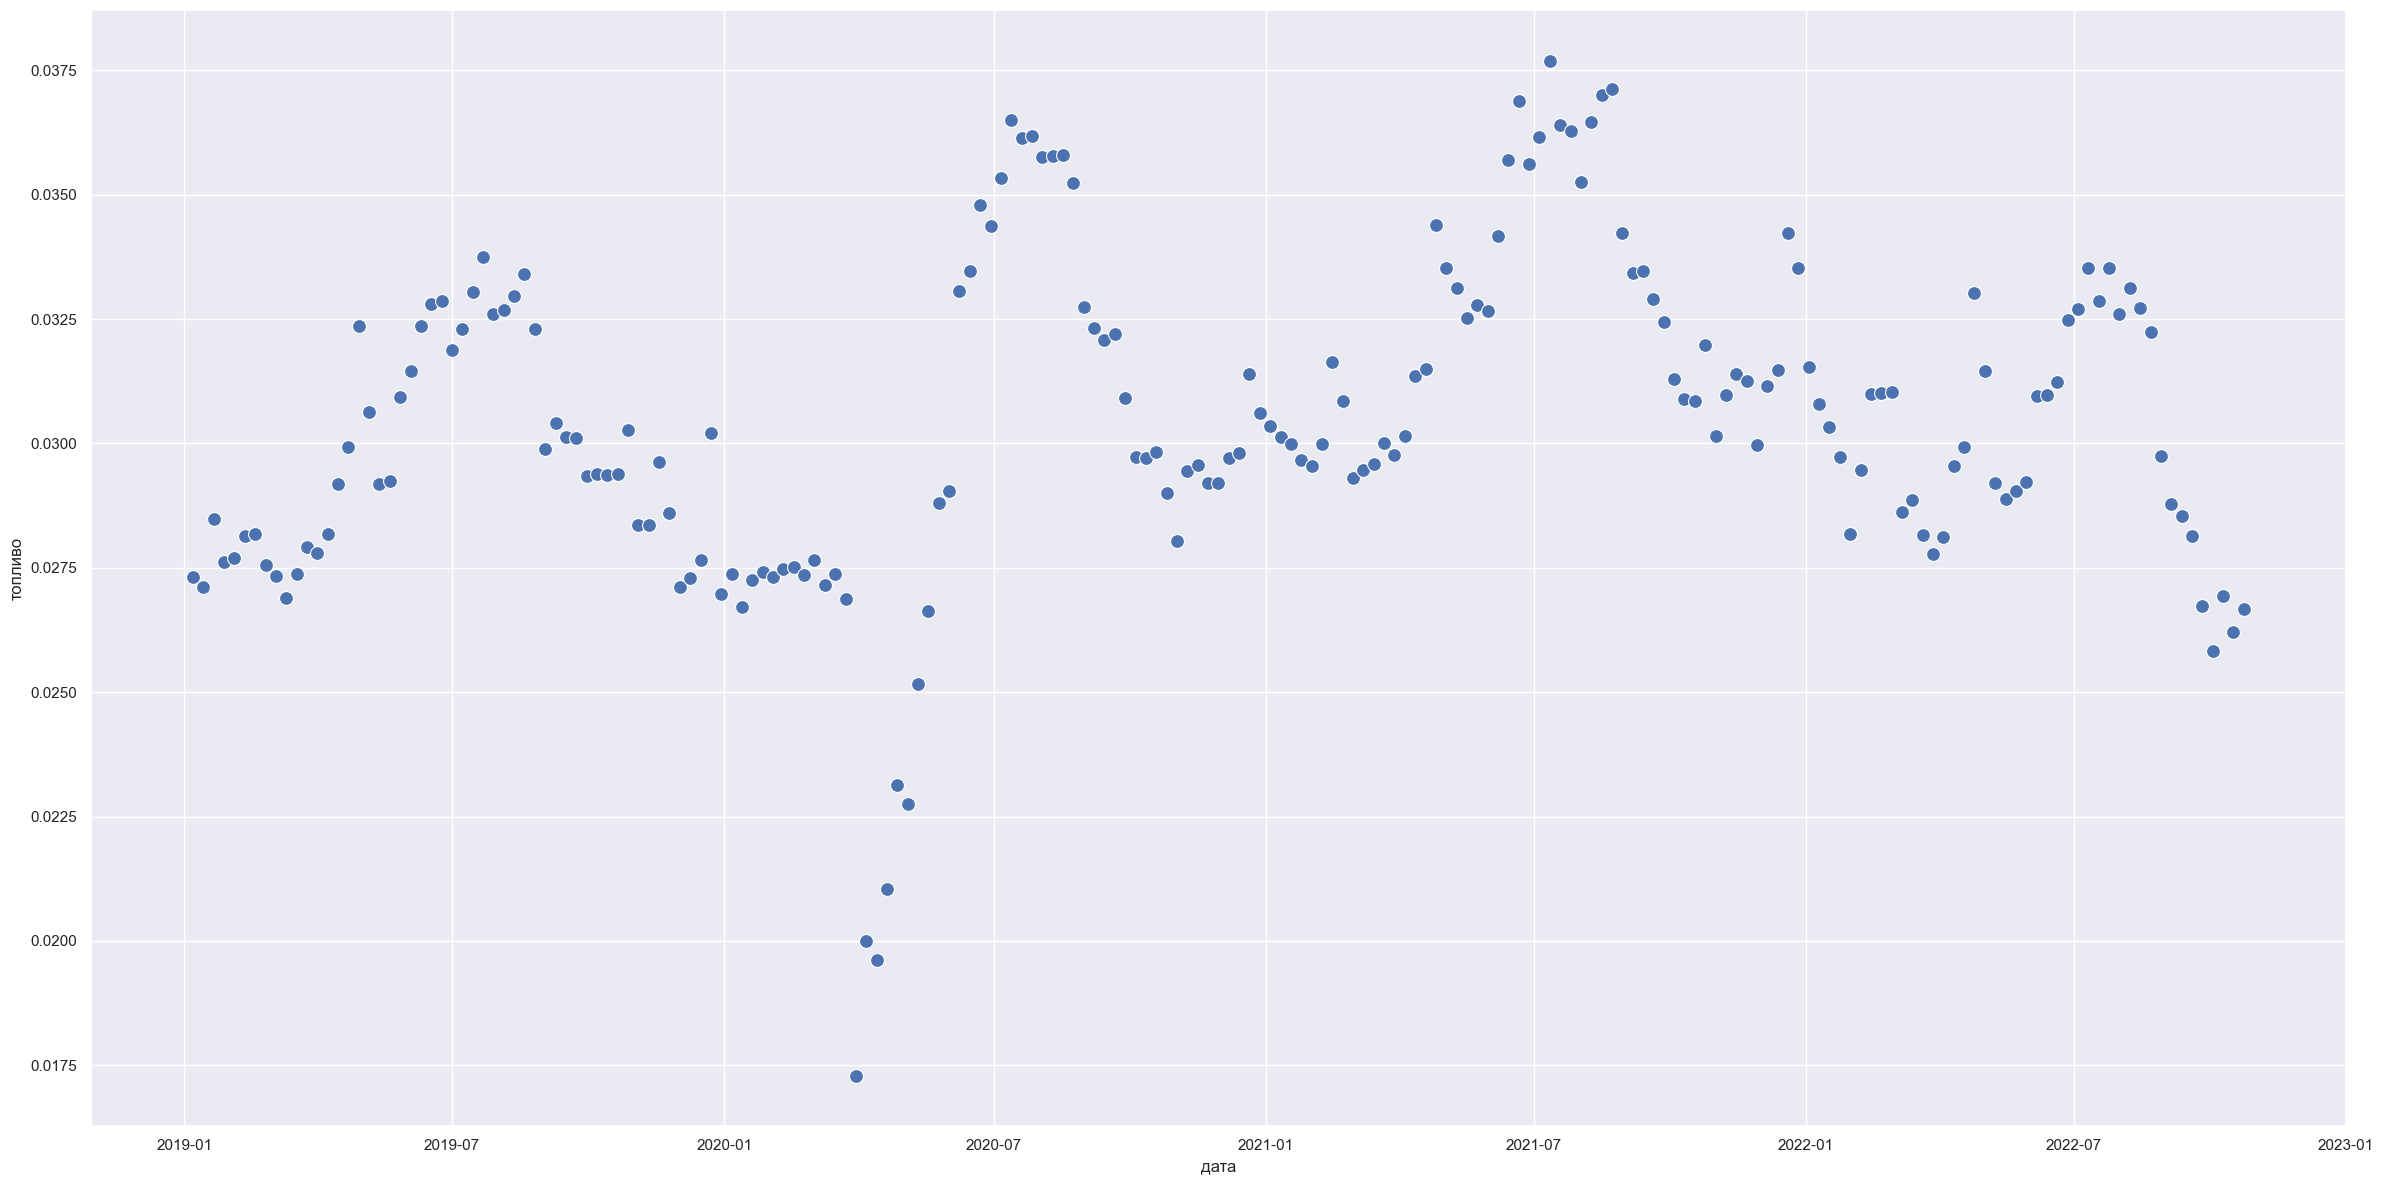

In [328]:
fig = plt.figure(layout = "tight", figsize = (24,12))
ax = fig.add_subplot(111)
sns.scatterplot(data = data_week_sum, y = "топливо", x = data_week_sum.index, ax = ax, s = 100, palette = "BuPu" )
pass

Вывод 4: Гипотеза оказалась неверной, в средем топливо стоит одинакого не зависимо от времени